In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load Plant 1 data
gen = pd.read_csv(r"C:\Users\User\Desktop\solar_code\Task\plant1\Plant_1_Generation_Data.csv")



In [3]:
type(gen)

pandas.core.frame.DataFrame

In [4]:
gen

,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
0,15-05-2020 00:00,4135001,1BY6WEcLGh8j5v7,0.0,0.0,0.000,6259559.0
1,15-05-2020 00:00,4135001,1IF53ai7Xc0U56Y,0.0,0.0,0.000,6183645.0
2,15-05-2020 00:00,4135001,3PZuoBAID5Wc2HD,0.0,0.0,0.000,6987759.0
3,15-05-2020 00:00,4135001,7JYdWkrLSPkdwr4,0.0,0.0,0.000,7602960.0
4,15-05-2020 00:00,4135001,McdE0feGgRqW7Ca,0.0,0.0,0.000,7158964.0
...,...,...,...,...,...,...,...
68773,17-06-2020 23:45,4135001,uHbuxQJl8lW7ozc,0.0,0.0,5967.000,7287002.0
68774,17-06-2020 23:45,4135001,wCURE6d3bPkepu2,0.0,0.0,5147.625,7028601.0
68775,17-06-2020 23:45,4135001,z9Y9gH1T5YWrNuG,0.0,0.0,5819.000,7251204.0
68776,17-06-2020 23:45,4135001,zBIq5rxdHJRwDNY,0.0,0.0,5817.000,6583369.0


In [ ]:
# Drop unnecessary columns
gen_clean = gen.drop(columns=['PLANT_ID', 'SOURCE_KEY', 'DAILY_YIELD', 'TOTAL_YIELD'])


In [6]:
gen_clean

,DATE_TIME,DC_POWER,AC_POWER
0,15-05-2020 00:00,0.0,0.0
1,15-05-2020 00:00,0.0,0.0
2,15-05-2020 00:00,0.0,0.0
3,15-05-2020 00:00,0.0,0.0
4,15-05-2020 00:00,0.0,0.0
...,...,...,...
68773,17-06-2020 23:45,0.0,0.0
68774,17-06-2020 23:45,0.0,0.0
68775,17-06-2020 23:45,0.0,0.0
68776,17-06-2020 23:45,0.0,0.0


In [ ]:
# Ensure DATE_TIME is datetime
gen_clean['DATE_TIME'] = pd.to_datetime(gen_clean['DATE_TIME'])

C:\Users\User\AppData\Local\Temp\ipykernel_26528\2245455549.py:2: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  gen_clean['DATE_TIME'] = pd.to_datetime(gen_clean['DATE_TIME'])


In [8]:
gen_clean

,DATE_TIME,DC_POWER,AC_POWER
0,2020-05-15 00:00:00,0.0,0.0
1,2020-05-15 00:00:00,0.0,0.0
2,2020-05-15 00:00:00,0.0,0.0
3,2020-05-15 00:00:00,0.0,0.0
4,2020-05-15 00:00:00,0.0,0.0
...,...,...,...
68773,2020-06-17 23:45:00,0.0,0.0
68774,2020-06-17 23:45:00,0.0,0.0
68775,2020-06-17 23:45:00,0.0,0.0
68776,2020-06-17 23:45:00,0.0,0.0


In [9]:
# Group by timestamp and sum across inverters
gen_sum = (
    gen_clean.groupby('DATE_TIME')[['DC_POWER','AC_POWER']]
    .sum()
    .reset_index()
    .sort_values('DATE_TIME')   # ensure ascending order
)

# Reset index after sorting
gen_sum = gen_sum.reset_index(drop=True)

# Show first few rows
print(gen_sum.head(10))
print(gen_sum.tail(10))

            DATE_TIME  DC_POWER  AC_POWER
0 2020-05-15 00:00:00       0.0       0.0
1 2020-05-15 00:15:00       0.0       0.0
2 2020-05-15 00:30:00       0.0       0.0
3 2020-05-15 00:45:00       0.0       0.0
4 2020-05-15 01:00:00       0.0       0.0
5 2020-05-15 01:15:00       0.0       0.0
6 2020-05-15 01:30:00       0.0       0.0
7 2020-05-15 01:45:00       0.0       0.0
8 2020-05-15 02:00:00       0.0       0.0
9 2020-05-15 02:15:00       0.0       0.0
               DATE_TIME  DC_POWER  AC_POWER
3148 2020-06-17 21:30:00       0.0       0.0
3149 2020-06-17 21:45:00       0.0       0.0
3150 2020-06-17 22:00:00       0.0       0.0
3151 2020-06-17 22:15:00       0.0       0.0
3152 2020-06-17 22:30:00       0.0       0.0
3153 2020-06-17 22:45:00       0.0       0.0
3154 2020-06-17 23:00:00       0.0       0.0
3155 2020-06-17 23:15:00       0.0       0.0
3156 2020-06-17 23:30:00       0.0       0.0
3157 2020-06-17 23:45:00       0.0       0.0


In [11]:
gen_sum

,DATE_TIME,DC_POWER,AC_POWER
0,2020-05-15 00:00:00,0.0,0.0
1,2020-05-15 00:15:00,0.0,0.0
2,2020-05-15 00:30:00,0.0,0.0
3,2020-05-15 00:45:00,0.0,0.0
4,2020-05-15 01:00:00,0.0,0.0
...,...,...,...
3153,2020-06-17 22:45:00,0.0,0.0
3154,2020-06-17 23:00:00,0.0,0.0
3155,2020-06-17 23:15:00,0.0,0.0
3156,2020-06-17 23:30:00,0.0,0.0


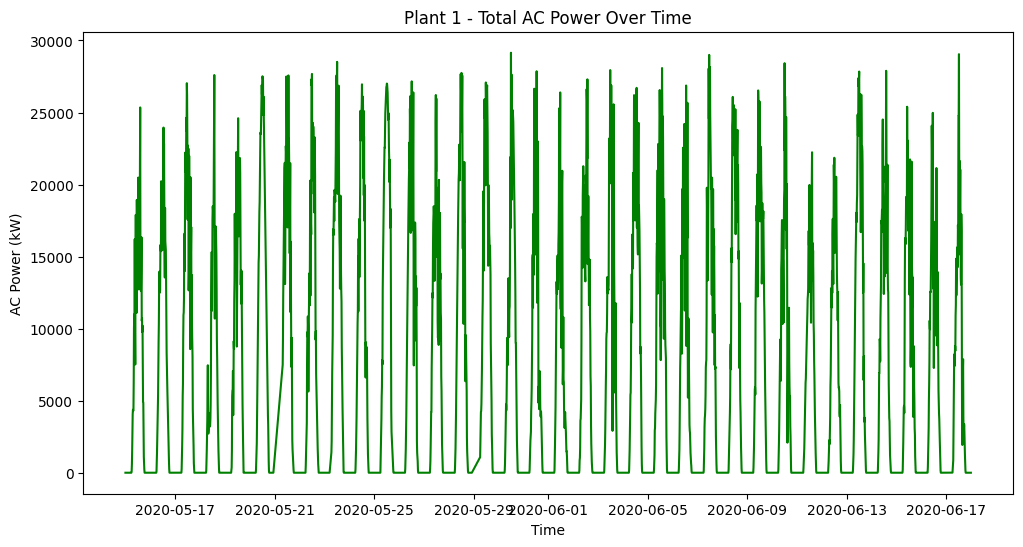

In [13]:
plt.figure(figsize=(12,6))
plt.plot(gen_sum['DATE_TIME'], gen_sum['AC_POWER'], color='green')
plt.title("Plant 1 - Total AC Power Over Time")
plt.xlabel("Time")
plt.ylabel("AC Power (kW)")
plt.show()


In [15]:
type(gen_sum)

pandas.core.frame.DataFrame

In [16]:
# Ensure datetime is in datetime format
gen_sum['DATE_TIME'] = pd.to_datetime(gen_sum['DATE_TIME'])

# Create full expected timeline (15-min intervals)
full_time_index = pd.date_range(
    start = gen_sum['DATE_TIME'].min(),
    end   = gen_sum['DATE_TIME'].max(),
    freq='15T'
)

C:\Users\User\AppData\Local\Temp\ipykernel_26528\4283563040.py:5: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  full_time_index = pd.date_range(


In [18]:
len(full_time_index)

3264

In [19]:
# Find missing in plant_sum
missing_in_gen = full_time_index.difference(gen_sum['DATE_TIME'])


In [20]:
print("Expected timestamps:", len(full_time_index))
print("Plant Sum rows:", len(gen_sum))


print("\n❌ Missing in Generation:", len(missing_in_gen))
print(missing_in_gen[:10])   # show first 10

Expected timestamps: 3264
Plant Sum rows: 3158

❌ Missing in Generation: 106
DatetimeIndex(['2020-05-15 23:15:00', '2020-05-15 23:30:00',
               '2020-05-15 23:45:00', '2020-05-16 00:00:00',
               '2020-05-16 00:15:00', '2020-05-16 00:30:00',
               '2020-05-16 00:45:00', '2020-05-16 01:00:00',
               '2020-05-16 01:15:00', '2020-05-16 01:30:00'],
              dtype='datetime64[ns]', freq=None)


In [3]:
# Reindex to full 15-min timeline
gen_sum = (
    gen_sum
    .set_index('DATE_TIME')           # make datetime the index
    .reindex(full_time_index)         # add missing timestamps
    .reset_index()                    # bring DATE_TIME back as a column
    .rename(columns={'index':'DATE_TIME'})
)

print("Shape after reindexing:", gen_sum.shape)  # should be 3264


NameError: name 'gen_sum' is not defined

In [23]:
# Interpolate missing values (linear between t-1 and t+1)
gen_sum[['DC_POWER','AC_POWER']] = gen_sum[['DC_POWER','AC_POWER']].interpolate(method='linear')


In [25]:

print("Final rows:", len(gen_sum))

Final rows: 3264


In [26]:
gen_sum.isnull ().sum()

DATE_TIME    0
DC_POWER     0
AC_POWER     0
dtype: int64

In [32]:
gen_sum.head(80)

,DATE_TIME,DC_POWER,AC_POWER
0,2020-05-15 00:00:00,0.0,0.0
1,2020-05-15 00:15:00,0.0,0.0
2,2020-05-15 00:30:00,0.0,0.0
3,2020-05-15 00:45:00,0.0,0.0
4,2020-05-15 01:00:00,0.0,0.0
...,...,...,...
75,2020-05-15 18:45:00,0.0,0.0
76,2020-05-15 19:00:00,0.0,0.0
77,2020-05-15 19:15:00,0.0,0.0
78,2020-05-15 19:30:00,0.0,0.0


In [33]:
# Save cleaned generation data
gen_sum.to_csv(
    r"C:\Users\User\Desktop\solar_code\Task\plant1\Plant1_Generation_Cleaned.csv",
    index=False
)

print("✅ Generation data saved successfully!")


✅ Generation data saved successfully!
